# Домашнее задание №2
## Pandas


### В этом домашнем задании не будет как таковых задач. Только несколько простых заданий, чтобы освоиться в важнейшей библиотеке pandas.

### №1
Импортируйте пандас как pd и считайте файл TSLA.csv (https://www.kaggle.com/efekurdoglu/teslastockprice/data) как датафрейм

In [2]:
import pandas as pd

df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


## №2
Удалите из столбца Close значения, целые части которых кратны 6

In [3]:



df.Close = df.Close.apply(lambda x: None if x%6==0 else x)

df



,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


## №3
Теперь попробуйте заполнить пропуски средним значением в столбце, потом минимумом, потом медианой

In [4]:
df[df['Close'].isna() == True] = df.Close.mean()
df.Close = df.Close.apply(lambda x: np.nan if x%6==0 else x)
df[df['Close'].isna() == True] = df.Close.min()
df.Close = df.Close.apply(lambda x: np.nan if x%6==0 else x)
df[df['Close'].isna() == True] = df.Close.median()

## №4
А теперь попробуйте заполнить эти пропуски средним между всеми значениями, кратным 5 и всеми значениями, кратным 7 (т.е. выберите все значение, кратные 5 и найдите их среднее, а потом все значение, кратные 7, найдите среднее среди них, а потом усредните два полученных значения).

In [5]:
df.Close = df.Close.apply(lambda x: np.nan if x%6==0 else x)
c5,c7 = 0,0
s5,s7 = 0,0
for i in range(0,2416):
    if df.Close[i]%5==0:
        c5+=1
        s5+=df.Close[i]
    if df.Close[i]%7==0:
        c7+=1
        s7+=df.Close[i]

s5 = s5/c5
s7 = s7/c7

s = (s5+s7)/2

df['Close'] = df['Close'].apply(lambda x: s if x==None else x)
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,1.876630e+07
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,1.718710e+07
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8.218800e+06
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5.139800e+06
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6.866900e+06
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,1.178850e+07
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,1.780150e+07
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,2.900570e+07
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,1.571930e+07


## №5
Импортируйте matplotlib.pyplot как plt. Постройте графики получишвихся наборов значений. Чтобы получше разглядеть, найдите как в pyplot задать размер графика и поставьте побольше. <br>
Оцените результаты, выберите какой вариант кажется наиболее разумным.

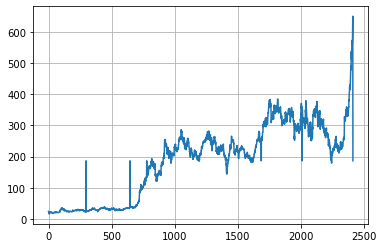

In [11]:
import matplotlib.pyplot as plt

x = df.Close
plt.grid()
plt.plot(x)


## №6
Приведите столбец High к строковому типу. Найдите все строки, где содержится цифра 9. <br>
*Подсказка*: загуглите pandas.str

In [33]:
s = pd.Series(df["High"], dtype= 'string')

for i in range(len(s)):
    if ("9" in s[i]):
        print(s[i])
    

25.92
16.629999
17.9
18.639999
21.299999
20.9
21.559999
20.9
20.879999
20.969999
21.950001
21.549999
19.98
19.65
18.879999
17.9
18.799999
19.4
19.59
19.25
19.110001
20.389999
19.709999
19.98
19.870001
20.190001
19.790001
20.690001
21.299999
20.950001
21.049999
20.93
20.9
21.549999
20.950001
20.139999
20.190001
20.809999
21.49
20.639999
20.790001
20.9
20.639999
20.690001
20.950001
20.93
20.98
21.379999
21.879999
24.969999
25.690001
29.969999
29.1
32.939999
35.970001
35.950001
36.419998
34.299999
32.490002
32.919998
30.389999
29.969999
30.91
32.189999
32.689999
27.9
26.950001
26.9
28.709999
26.969999
25.639999
25.469999
23.59
24.809999
24.889999
24.879999
24.879999
23.9
23.639999
24.139999
24.969999
25.49
23.49
24.790001
24.99
24.959999
24.99
24.49
22.959999
23.190001
23.049999
22.379999
24.49
28.709999
27.940001
25.209999
25.690001
26.09
26.98
27.690001
27.799999
27.389999
28.950001
28.299999
28.190001
27.99
26.469999
29.01
29.76
29.67
29.32
30.129999
29.389999
28.299999
28.879999
29.70

## №7
А теперь найдите в этом столбце строки, которые содержат цифру 4, но не содержат цифру 8.

In [31]:
s = pd.Series(df["High"], dtype= 'string')

for i in range(len(s)):
    if ("4" in s[i]) and not ("8" in s[i]):
        print(s[i])

30.42
20.440001
21.549999
19.4
21.24
21.049999
21.549999
21.49
20.41
24.969999
31.4
30.74
33.450001
34.299999
31.450001
32.400002
32.490002
31.540001
27.4
25.469999
24.450001
24.120001
24.73
24.139999
24.969999
25.49
23.49
24.1
24.32
24.790001
24.99
25.4
24.959999
24.99
24.49
24.25
24.0
23.43
23.049999
23.540001
24.0
24.49
27.940001
27.440001
27.74
26.469999
26.459999
27.450001
30.440001
29.540001
24.440001
25.450001
25.440001
26.540001
24.219999
24.77
24.0
24.030001
24.1
24.93
24.32
27.469999
32.490002
32.400002
31.49
34.5
33.540001
34.400002
34.900002
34.110001
32.439999
32.049999
32.41
29.24
29.34
27.49
27.34
27.74
34.41
34.970001
34.720001
34.970001
34.52
34.0
34.439999
34.119999
34.5
34.5
34.400002
33.490002
34.630001
35.490002
35.439999
34.290001
34.040001
33.43
34.209999
34.0
32.459999
33.439999
31.34
31.049999
30.41
31.42
29.450001
34.5
34.279999
34.119999
32.450001
34.400002
31.040001
27.549999
29.940001
30.040001
30.24
31.74
31.49
29.4
29.49
29.549999
32.049999
31.42
31.44000

## №8
И наконец найдите в столбце Hihg (пусть там все еще будет строковый тип) такие строчки, у которых в дробной части есть цифра 3 и замените ее на 4. <br>
*Подсказка*: может помочь метод split. <br>
А потом замените эти значения в датафрейме на какое-нибудь слово. Например, лопата.

In [34]:
s = pd.Series(df["High"], dtype= 'string')

for i in range(len(s)):
    x = s[i].split('.')
    if '3' in x[1]:
        b = x[1].replace('3','4')
        print(x[0] + '.' + b)

18.649999
20.489999
20.94
21.42
21.45
20.149999
22.040001
20.649999
21.040001
20.649999
20.94
21.479999
25.44
32.949999
31.470001
35.440002
30.489999
25.649999
24.74
23.649999
24.149999
24.42
23.44
22.479999
26.540001
26.74
27.460001
27.489999
29.42
29.489999
27.74
29.44
29.149999
28.540001
29.040001
27.84
27.84
25.479999
27.149999
23.94
186.21295447676417
24.040001
23.409999
24.94
24.42
28.44
28.470001
32.449999
32.94
30.94
28.94
29.44
27.94
28.479999
27.44
31.44
34.449999
33.410001
35.410001
35.42
34.640001
38.449999
37.949999
35.449999
33.44
33.74
33.640001
33.460001
34.489999
32.74
33.449999
32.140001
31.44
31.94
28.489999
30.649999
32.440002
32.449998
31.74
31.84
30.489999
30.489999
29.479999
28.649999
29.45
31.040001
28.74
28.45
30.94
32.840002
34.449998
33.480001
34.24
186.21295447676417
38.449999
39.489999
37.489999
36.489999
35.840002
39.449999
39.449999
39.480001
38.480001
41.840002
45.149999
46.149999
62.469999
97.120004
97.620004
100.480004
103.980004
102.870004
105.870004


## №9
Сейчас вы научитесь нормализовывать данные. Но сначала я объясню, зачем. <br>

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.

Этот процесс повышения пригодности функций для обучения путем изменения масштаба называется масштабированием функций.

Вот формула, которую часто применяют для нормализации значений одного столбца:
$$ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}, $$
где, понятное дело x - значение в конкретной строке выбранного столбца, xmax - максимальное значение этого столбца, а xmin - минимальное значение этого столбца.

Примените эту формулу к столбцу Open (используйте метод apply).

In [35]:
df.Open = (df["Open"] - df["Open"].min())/(df["Open"].max() - df["Open"].min())
df.Open

0       0.004584
1       0.015468
2       0.014202
3       0.010996
4       0.006187
          ...   
2411    0.885375
2412    0.896916
2413    0.987850
2414    1.000000
2415    0.272614
Name: Open, Length: 2416, dtype: float64

## №10
И, правда наконец, создайте пустой датафрейм с такими же колонками, как TSLA. Пусть в нем будет 10 строк. И пусть они будут заполнены такими значениями: в i-й строке j-го столбца должна быть j-ая степень числа i+j. Добавьте этот датафрейм в конец исходного. <br>
Используйте метод tail, чтобы увидеть конец полученного датафрейма и порадоваться, что у вас все получилось и вы готовы реально обрабатывать датафреймы и заниматься дата сасом.

In [36]:
alp = ["Date","Open","High","Low","Close", "Adj Close","Volume"]

frame = pd.DataFrame(columns=["Date","Open","High",	"Low","Close", "Adj Close","Volume"], index=[i for i in range(10) ])

for s in alp:
    for j in range(10):
        x = alp.index(s)
        frame[s][j] = (x+j)**x

fr = pd.concat([df,frame],ignore_index=True)
print(fr.tail(10))

     Date Open High   Low  Close Adj Close    Volume
2416    1    1    4    27    256      3125     46656
2417    1    2    9    64    625      7776    117649
2418    1    3   16   125   1296     16807    262144
2419    1    4   25   216   2401     32768    531441
2420    1    5   36   343   4096     59049   1000000
2421    1    6   49   512   6561    100000   1771561
2422    1    7   64   729  10000    161051   2985984
2423    1    8   81  1000  14641    248832   4826809
2424    1    9  100  1331  20736    371293   7529536
2425    1   10  121  1728  28561    537824  11390625
